# About Dataset

**Milk Quality Prediction (Classification)**

**About dataset**

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.

**Usage**

The target variable is nothing but the Grade of the milk. It can be

Target

Low (Bad)

Medium (Moderate)

High (Good)

If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.
Temperature and ph are given their actual values in the dataset.

We have to perform data preprocessing, and data augmentation techniques to build statistical and predictive models to predict the quality of the milk.

**Inspiration**

To leverage the benefits of machine learning in the dairy industry.

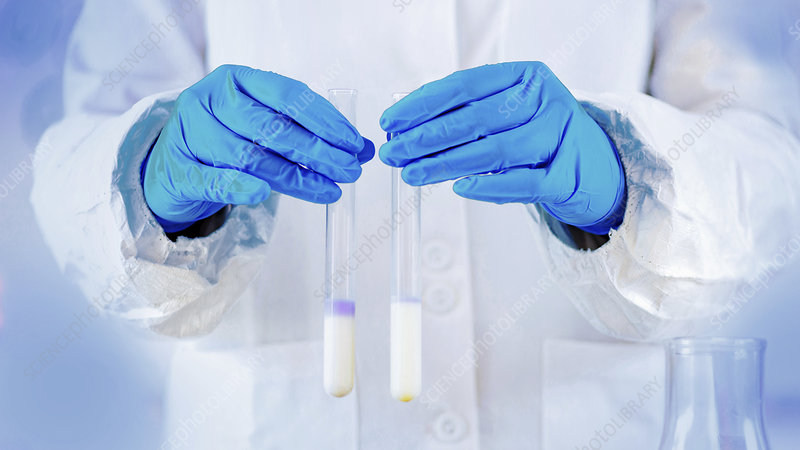

In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px

import warnings

import ydata_profiling as pp

warnings.filterwarnings('ignore')

%matplotlib inline

sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.tree import DecisionTreeClassifier

import lightgbm as lgb

import xgboost as xgb

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score, recall_score, roc_auc_score,confusion_matrix,classification_report

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

C:\Users\Ola\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Ola\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
 

In [2]:
df = pd.read_csv('milknew.csv')

Gaining General over view of the data

In [3]:
#Stripping any white space in the column names

df.columns = df.columns.str.strip()

In [4]:
#Renaming the Column name Temprature to Temperature

df.rename(columns = {'Temprature':'Temperature'}, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Taste        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Fat          1059 non-null   int64  
 5   Turbidity    1059 non-null   int64  
 6   Colour       1059 non-null   int64  
 7   Grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [6]:
df.describe()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [7]:
profile_report = pp.ProfileReport(df)

profile_report.to_file('ProfileReport.html')

profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Observation**

There are 976 duplicate rows accounting for 92.16% of the data

However since the number is too high to drop and after close analysis, there is a chance milk can have same qualities as in the features

In [8]:
print('There are', df.duplicated().sum(),'duplicated values')

percentage_dupl = round((df.duplicated().sum()) / df.shape[0] * 100,2)

print('Duplicated values account for ',percentage_dupl,'%')

df[df.duplicated()].reset_index(drop= True)

There are 976 duplicated values
Duplicated values account for  92.16 %


,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.8,45,0,1,1,1,255,high
1,9.5,34,1,1,0,1,255,low
2,6.6,37,1,1,1,1,255,high
3,5.5,45,1,0,1,1,250,low
4,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
971,6.7,45,1,1,0,0,247,medium
972,6.7,38,1,0,1,0,255,high
973,3.0,40,1,1,1,1,255,low
974,6.8,43,1,0,1,0,250,high


# Exploratory Data Analysis

## Univariate Analysis

In [9]:
df.columns

Index(['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

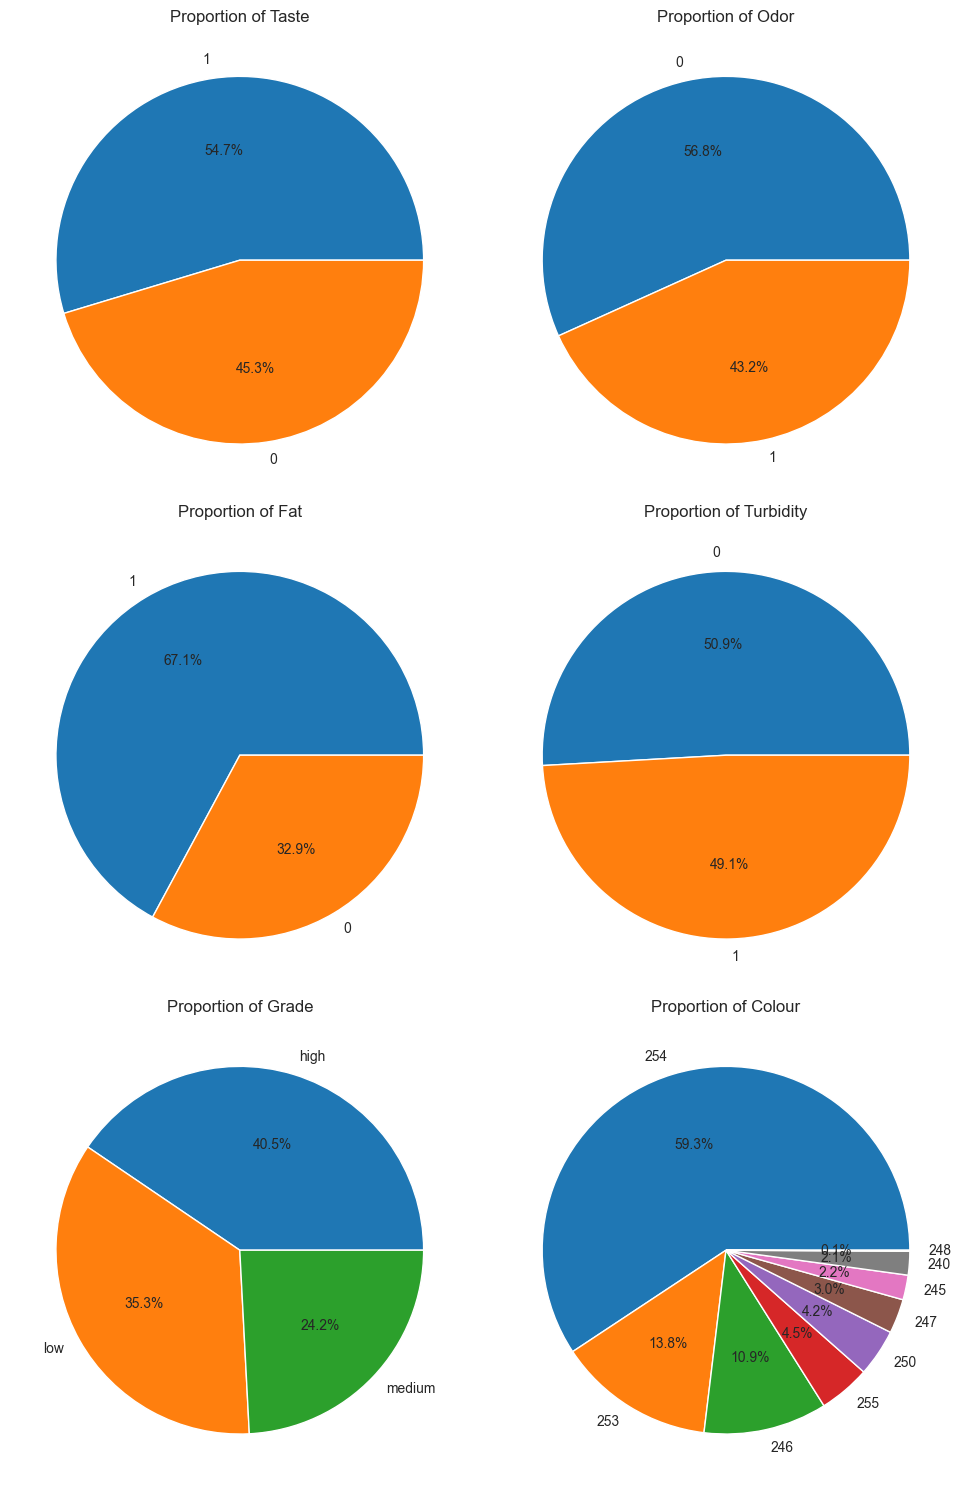

In [10]:
def pie_plots(features):
    
    num_features = len(features)
    
    num_cols = 2
    
    num_rows = (num_features + num_cols - 1) // num_cols

    plt.figure(figsize=(10, 5 * num_rows))

    for i, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.pie(df[feature].value_counts(), labels=df[feature].unique(), autopct='%1.1f%%')
        plt.title(f'Proportion of {feature}')

    plt.tight_layout()
    plt.show()

# Assuming df is your DataFrame
binary_features= ['Taste', 'Odor', 'Fat', 'Turbidity','Grade','Colour']
pie_plots(binary_features)


**Observation**

1. Presence of Taste and Fat was detected in many instances at 54.7% and 67.1% respectively

2. Odor and Turbidity wasnt as weren't as satisfied with a proportion of 56.8 and 50.9 percent of no satisfaction respectively

3. High Grade was more prevalent than the rest of the grades

4. Color 254 was the most dominant observation

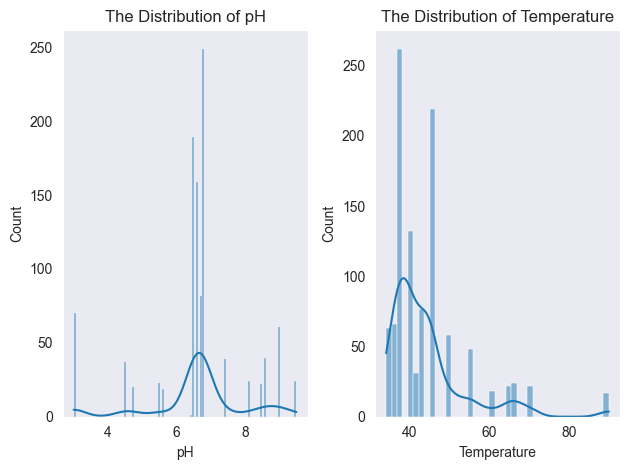

In [11]:
features = ['pH','Temperature']

num_features = len(features)

num_cols = 2

num_rows = (num_features + num_cols -1) // num_cols

for i, feature in enumerate(features):
    
    plt.subplot(num_rows, num_cols, i+1)
    
    sns.histplot(x= df[feature],kde= True)
    
    plt.grid(False)
    
    plt.title(f'The Distribution of {feature}')
    
plt.tight_layout()

plt.show()

**Observation**

1. From the KDE it is worth noting that the pH has one Gaussian, indication of a roughly normal distribution

2. Temperature Distribution has one Gaussian as well but is more skewed to the right, indication of possible outliers

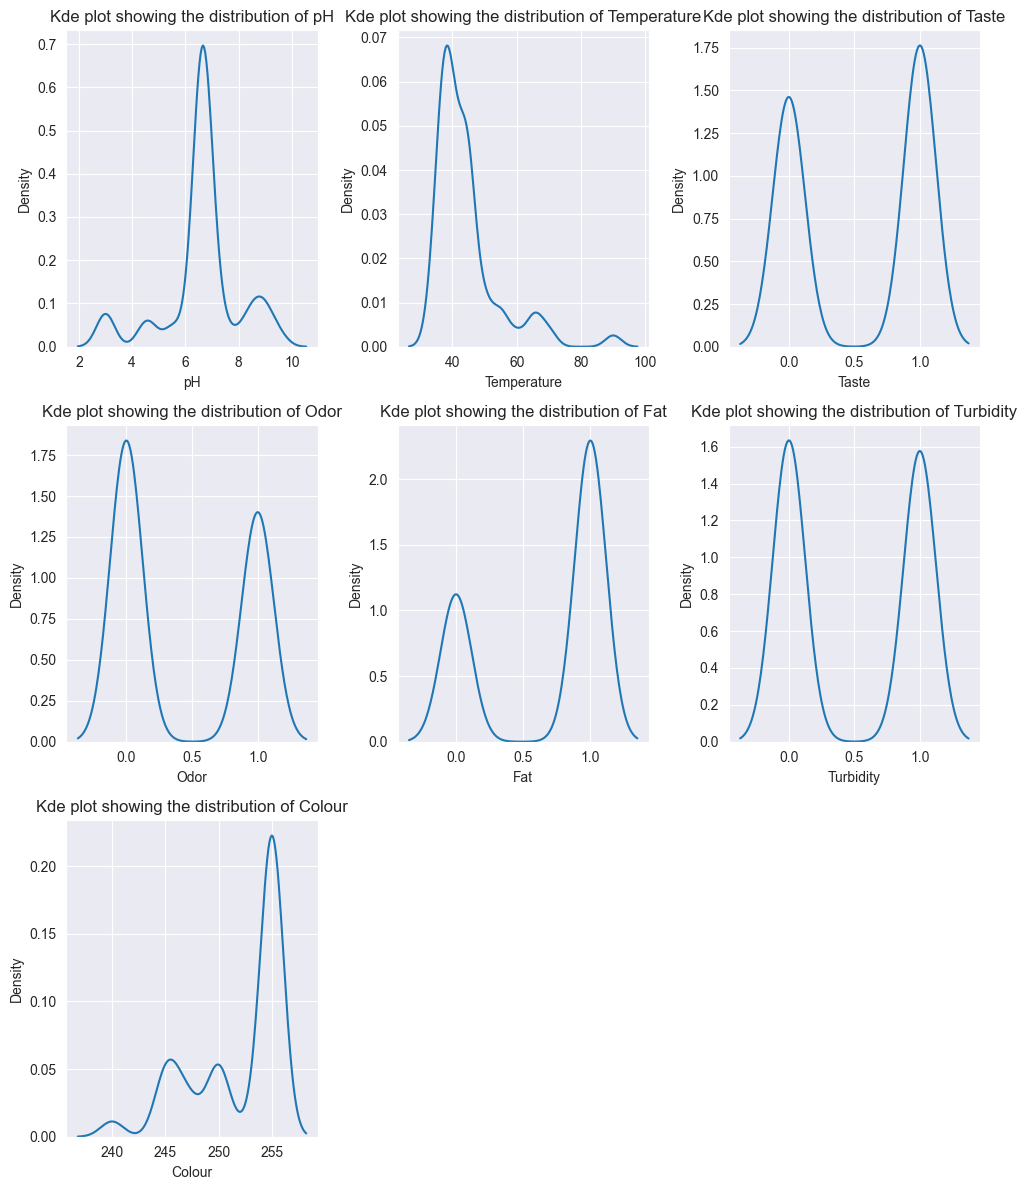

In [12]:
features = df.drop(columns='Grade').columns.tolist()

num_features = len(features)

num_cols = 3

num_rows = (num_features + num_cols -1) // num_cols

plt.figure(figsize= (10, 4 * num_rows))

for i, feature in enumerate(features):
    
    plt.subplot(num_rows,num_cols, i+1)
    
    sns.kdeplot(df[feature])
    
    plt.title(f'Kde plot showing the distribution of {feature}')
    
plt.tight_layout()

plt.show()

**Observation**
1. Taste, Odor, Fat, Turbidity, have 2 Gaussians due to the fact that there are only two unique values in them

2. Color has multiple Gaussians inferring presence of subpopulations or clusters

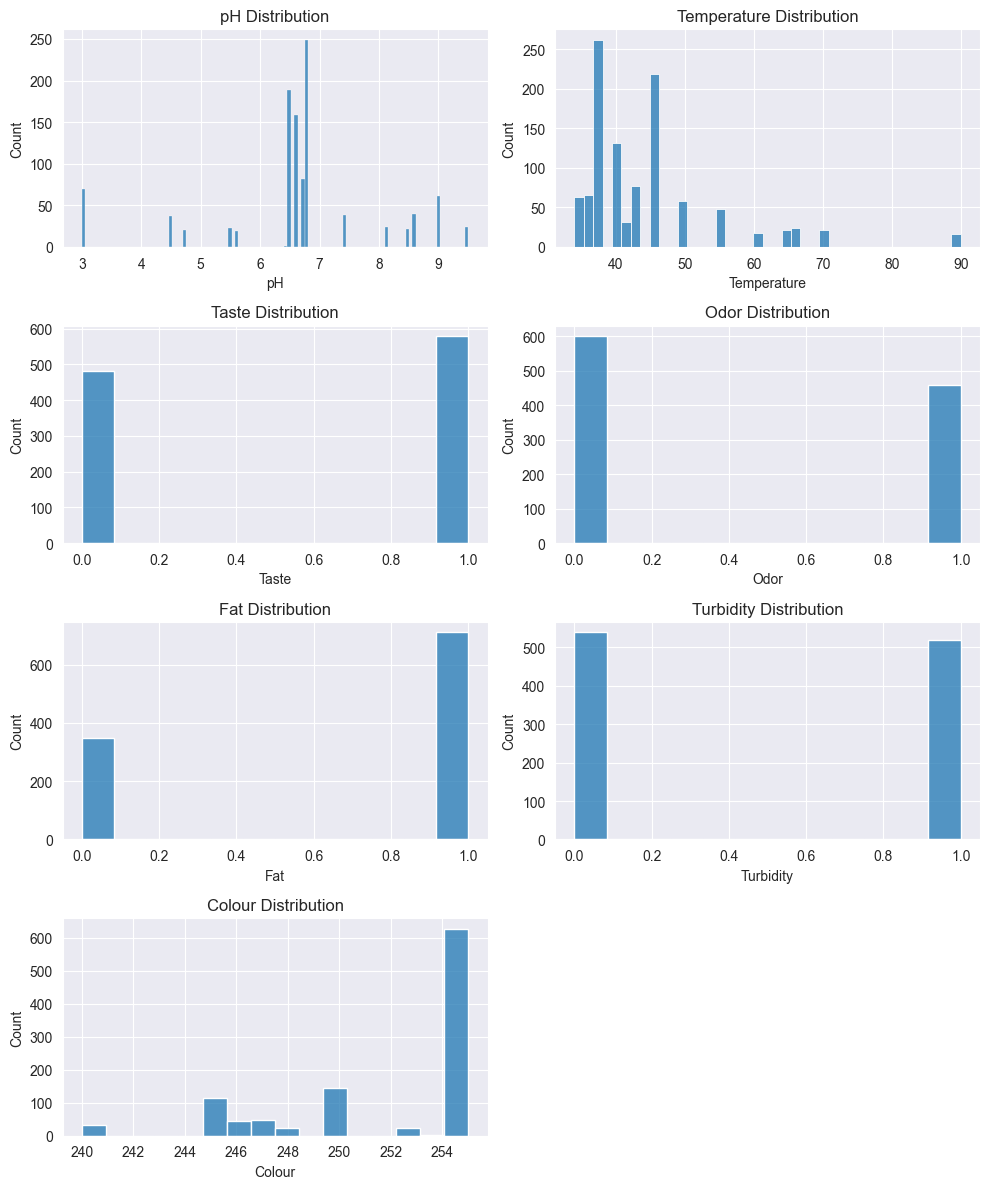

In [13]:
features = df.drop(columns='Grade').columns.tolist()

num_features = len(features)

num_cols = 2

num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(10, 3 * num_rows))

for i, feature in enumerate(features):
    
    plt.subplot(num_rows, num_cols, i + 1)
    
    sns.histplot(df[feature])
    
    plt.title(f'{feature} Distribution')
    
plt.tight_layout()

plt.show()

## Bivariate Analysis

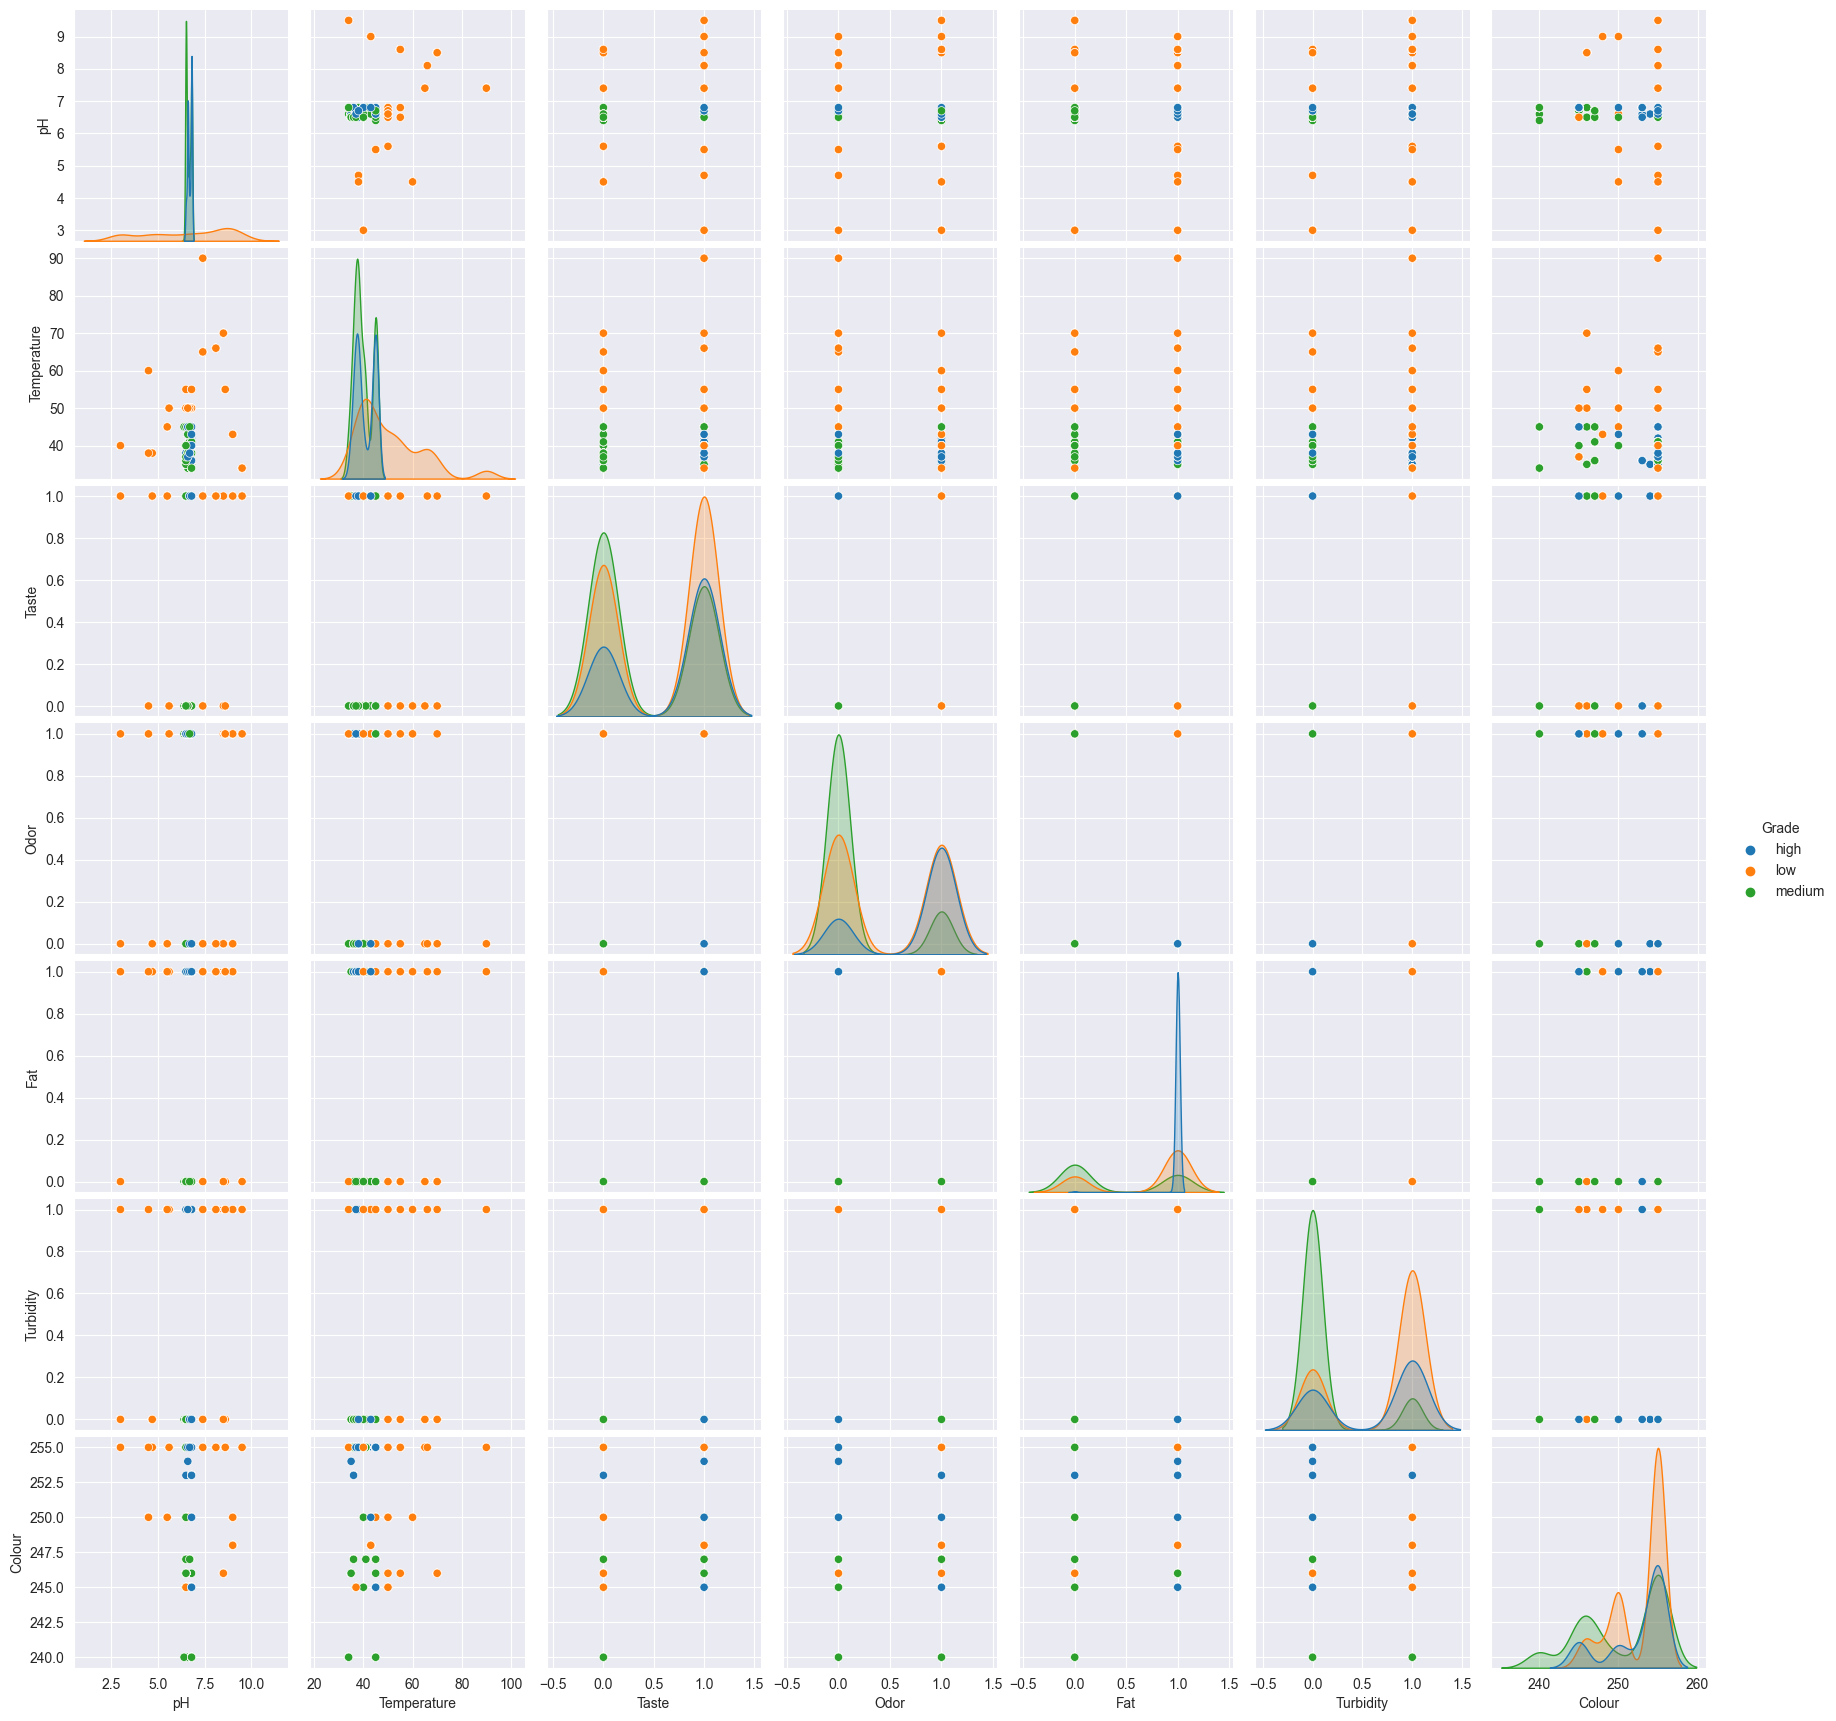

In [14]:
sns.pairplot(df,diag_kind= 'kde',hue= 'Grade')
plt.grid(False)

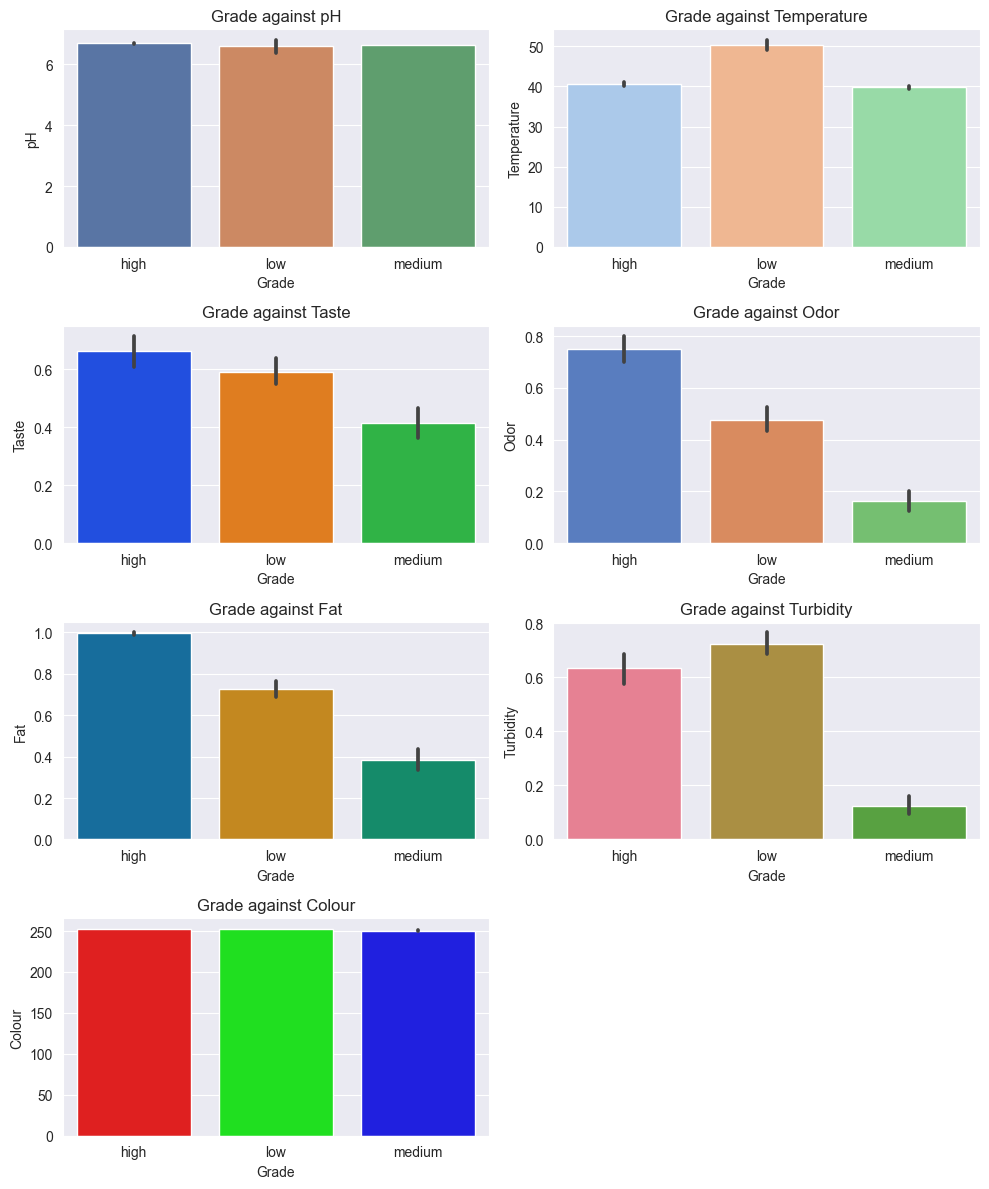

In [15]:
features = df.drop(columns='Grade').columns.tolist()

num_features = len(features)

num_cols = 2

num_rows = (num_features + num_cols - 1) // num_cols

palettes = ["deep", "pastel", "bright", "muted", "colorblind", "husl", ["#FF0000", "#00FF00", "#0000FF"]]

plt.figure(figsize=(10, 3 * num_rows))

for i, feature in enumerate(features):
    
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Select the palette for the current iteration
    current_palette = palettes[i % len(palettes)]
    
    sns.set_palette(current_palette)
    
    sns.barplot(x=df['Grade'], y=df[feature])
    
    plt.title(f'Grade against {feature}')

plt.tight_layout()

plt.show()


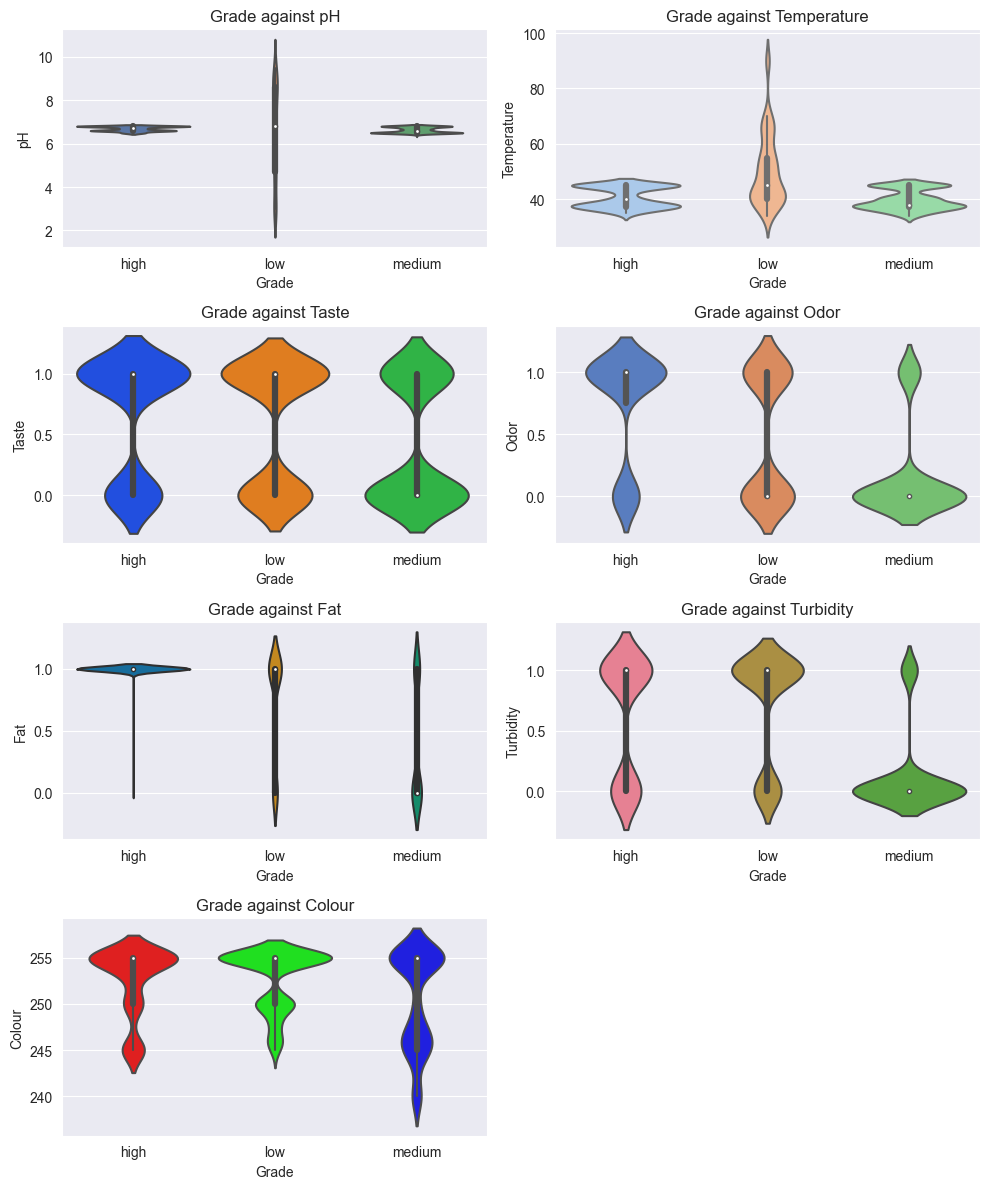

In [16]:
features = df.drop(columns='Grade').columns.tolist()

num_features = len(features)

num_cols = 2

num_rows = (num_features + num_cols - 1) // num_cols

palettes = ["deep", "pastel", "bright", "muted", "colorblind", "husl", ["#FF0000", "#00FF00", "#0000FF"]]

plt.figure(figsize=(10, 3 * num_rows))

for i, feature in enumerate(features):
    
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Select the palette for the current iteration
    current_palette = palettes[i % len(palettes)]
    
    sns.set_palette(current_palette)
    
    sns.violinplot(x=df['Grade'], y=df[feature])
    
    plt.title(f'Grade against {feature}')

plt.tight_layout()

plt.show()


## Multivariate Analysis

<Axes: >

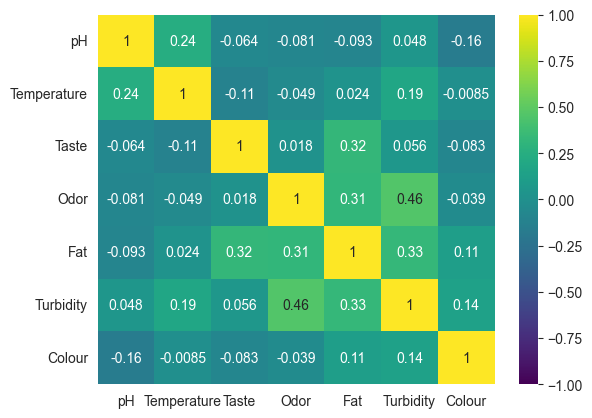

In [17]:
sns.heatmap(df.corr(),annot=True,cmap= 'viridis',vmin= -1,vmax= 1)

# Data Modelling


In [18]:
df.corr()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temperature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


**Data Encoding**

In [19]:
encoder = LabelEncoder()

df['Grade'] = encoder.fit_transform(df['Grade'])


In [20]:
X = df.drop(columns= 'Grade')

y = df['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

**Scaling the data to a mean of 0 and a standard deviation of 1**

In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

**XGBoost Classifier**

Training accuracy score: 1.0
Testing accuracy score: 0.9905660377358491
              precision    recall  f1-score     support
0              1.000000  0.984848  0.992366   66.000000
1              1.000000  0.985507  0.992701   69.000000
2              0.974684  1.000000  0.987179   77.000000
accuracy       0.990566  0.990566  0.990566    0.990566
macro avg      0.991561  0.990119  0.990749  212.000000
weighted avg   0.990805  0.990566  0.990591  212.000000


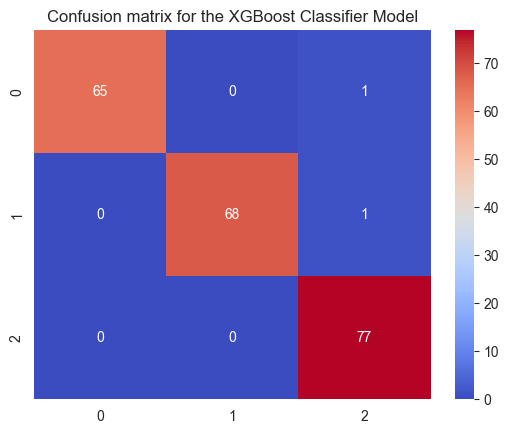

In [22]:
xgbClassifier = xgb.XGBClassifier()

xgbClassifier.fit(X_train_scaled,y_train)

ypred_train = xgbClassifier.predict(X_train_scaled)

ypred_test = xgbClassifier.predict(X_test_scaled)

print('Training accuracy score:', xgbClassifier.score(X_train_scaled, y_train))

print('Testing accuracy score:', xgbClassifier.score(X_test_scaled, y_test))

xgb_cm = confusion_matrix(y_test, ypred_test)

sns.heatmap(xgb_cm, annot= True,cmap= 'coolwarm')

plt.title('Confusion matrix for the XGBoost Classifier Model')

xgb_pred = xgbClassifier.predict(X_test_scaled)

class_report = classification_report(y_test, xgb_pred, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

**Random Forest Classifier**

Training accuracy score: 1.0
Testing accuracy score: 0.9905660377358491
              precision    recall  f1-score     support
0              1.000000  0.984848  0.992366   66.000000
1              1.000000  0.985507  0.992701   69.000000
2              0.974684  1.000000  0.987179   77.000000
accuracy       0.990566  0.990566  0.990566    0.990566
macro avg      0.991561  0.990119  0.990749  212.000000
weighted avg   0.990805  0.990566  0.990591  212.000000


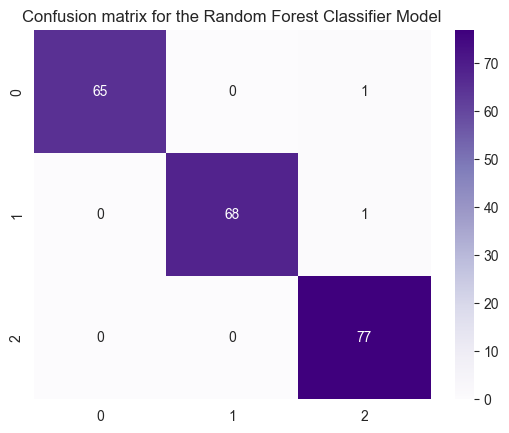

In [23]:
rf = RandomForestClassifier(n_estimators= 100)

rf.fit(X_train_scaled, y_train)

ypred_train = rf.predict(X_train_scaled)

ypred_test = rf.predict(X_test_scaled)

print('Training accuracy score:', rf.score(X_train_scaled, y_train))

print('Testing accuracy score:', rf.score(X_test_scaled, y_test))

rf_cm = confusion_matrix(y_test, ypred_test)

sns.heatmap(rf_cm, annot= True,cmap= 'Purples')

plt.title('Confusion matrix for the Random Forest Classifier Model')

rf_pred = rf.predict(X_test_scaled)

class_report = classification_report(y_test, rf_pred, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

**ExtraTreesClassifier**

Training accuracy score: 1.0
Testing accuracy score: 0.9905660377358491
              precision    recall  f1-score     support
0              1.000000  0.984848  0.992366   66.000000
1              1.000000  0.985507  0.992701   69.000000
2              0.974684  1.000000  0.987179   77.000000
accuracy       0.990566  0.990566  0.990566    0.990566
macro avg      0.991561  0.990119  0.990749  212.000000
weighted avg   0.990805  0.990566  0.990591  212.000000


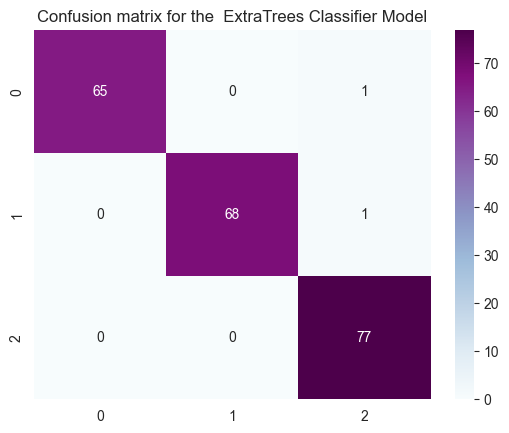

In [24]:
et = ExtraTreesClassifier(n_estimators= 100)

et.fit(X_train_scaled, y_train)

ypred_train = et.predict(X_train_scaled)

ypred_test = et.predict(X_test_scaled)

print('Training accuracy score:', et.score(X_train_scaled, y_train))

print('Testing accuracy score:', et.score(X_test_scaled, y_test))

et_cm = confusion_matrix(y_test, ypred_test)

sns.heatmap(et_cm, annot= True,cmap= 'BuPu')

plt.title('Confusion matrix for the  ExtraTrees Classifier Model')

et_pred = xgbClassifier.predict(X_test_scaled)

class_report = classification_report(y_test, et_pred, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

**Logistic Regression Classifier**

Training accuracy score: 0.8571428571428571
Testing accuracy score: 0.839622641509434
              precision    recall  f1-score     support
0              0.782609  0.818182  0.800000   66.000000
1              0.824324  0.884058  0.853147   69.000000
2              0.913043  0.818182  0.863014   77.000000
accuracy       0.839623  0.839623  0.839623    0.839623
macro avg      0.839992  0.840141  0.838720  212.000000
weighted avg   0.843561  0.839623  0.840185  212.000000


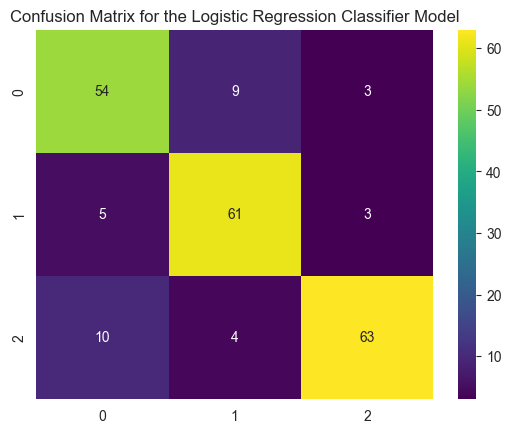

In [25]:
lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)

ypred_train = lr.predict(X_train_scaled)

ypred_test = lr.predict(X_test_scaled)

print('Training accuracy score:', lr.score(X_train_scaled, y_train))

print('Testing accuracy score:', lr.score(X_test_scaled, y_test))

# Create the confusion matrix for the test data
cm = confusion_matrix(y_test, ypred_test)

sns.heatmap(cm, annot= True,cmap= 'viridis')

plt.title('Confusion Matrix for the Logistic Regression Classifier Model')

lr_pred = lr.predict(X_test_scaled)

class_report = classification_report(y_test, lr_pred, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

**K Nearest Neighbors Classifier**

Training accuracy score: 0.9976387249114522
Testing accuracy score: 0.9858490566037735
              precision    recall  f1-score     support
0              0.985075  1.000000  0.992481   66.000000
1              0.985294  0.971014  0.978102   69.000000
2              0.987013  0.987013  0.987013   77.000000
accuracy       0.985849  0.985849  0.985849    0.985849
macro avg      0.985794  0.986009  0.985865  212.000000
weighted avg   0.985850  0.985849  0.985815  212.000000


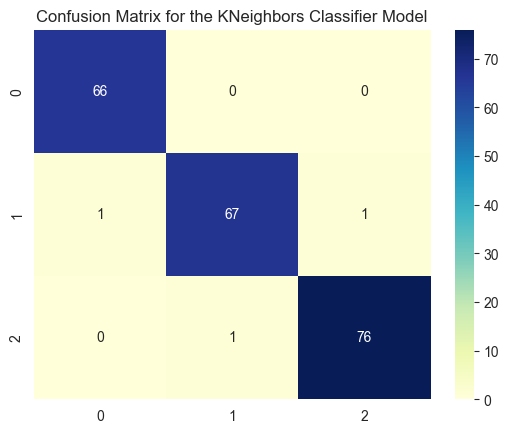

In [26]:
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

ypred_train = knn.predict(X_train_scaled)

ypred_test = knn.predict(X_test_scaled)

print('Training accuracy score:', knn.score(X_train_scaled, y_train))

print('Testing accuracy score:', knn.score(X_test_scaled, y_test))

knn_pred = knn.predict(X_test_scaled)

knn_cm = confusion_matrix(y_test, ypred_test)

sns.heatmap(knn_cm, annot= True,cmap= 'YlGnBu')

plt.title('Confusion Matrix for the KNeighbors Classifier Model')

class_report = classification_report(y_test, knn_pred, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

**Light Gradient Boosting Classifier**

Training accuracy score: 1.0
Testing accuracy score: 0.9905660377358491
              precision    recall  f1-score     support
0              1.000000  0.984848  0.992366   66.000000
1              1.000000  0.985507  0.992701   69.000000
2              0.974684  1.000000  0.987179   77.000000
accuracy       0.990566  0.990566  0.990566    0.990566
macro avg      0.991561  0.990119  0.990749  212.000000
weighted avg   0.990805  0.990566  0.990591  212.000000


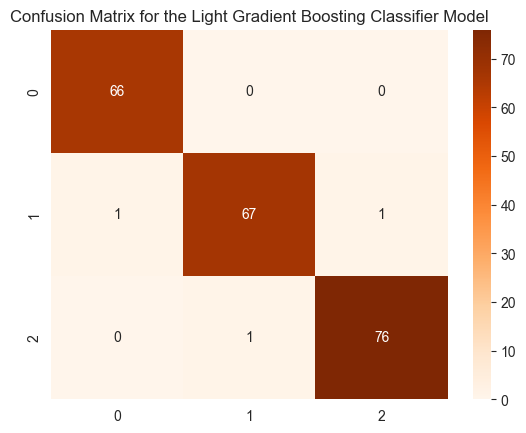

In [27]:
classifier = lgb.LGBMClassifier()

classifier.fit(X_train_scaled, y_train)

y_pred_train = classifier.predict(X_train_scaled)

y_pred_test = classifier.predict(X_test_scaled)

print('Training accuracy score:', classifier.score(X_train_scaled, y_train))

print('Testing accuracy score:', classifier.score(X_test_scaled, y_test))

lgb_cm = confusion_matrix(y_test, ypred_test)

sns.heatmap(lgb_cm, annot= True,cmap= 'Oranges')

plt.title('Confusion Matrix for the Light Gradient Boosting Classifier Model')

lgb_pred = classifier.predict(X_test_scaled)

class_report = classification_report(y_test, lgb_pred, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

**Decision Trees Classifier**

Training accuracy score: 1.0
Testing accuracy score: 0.9905660377358491
              precision    recall  f1-score     support
0              1.000000  0.984848  0.992366   66.000000
1              1.000000  0.985507  0.992701   69.000000
2              0.974684  1.000000  0.987179   77.000000
accuracy       0.990566  0.990566  0.990566    0.990566
macro avg      0.991561  0.990119  0.990749  212.000000
weighted avg   0.990805  0.990566  0.990591  212.000000


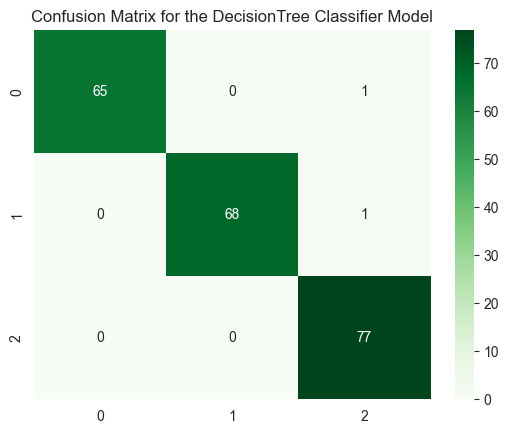

In [28]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train_scaled, y_train)

ypred_train = dtc.predict(X_train_scaled)

ypred_test = dtc.predict(X_test_scaled)

print('Training accuracy score:', dtc.score(X_train_scaled, y_train))

print('Testing accuracy score:', dtc.score(X_test_scaled, y_test))

dtc_cm = confusion_matrix(y_test, ypred_test)

sns.heatmap(dtc_cm, annot= True,cmap= 'Greens')

plt.title('Confusion Matrix for the DecisionTree Classifier Model')

dt_pred = dtc.predict(X_test_scaled)

class_report = classification_report(y_test, dt_pred, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

**Chris**